In [50]:
%matplotlib inline
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Contour plot - Linear scale

In [51]:
npoints = 2000                                  # create some random data
lons = np.random.uniform(125, 150, npoints)
lats = np.random.uniform(28, 48, npoints)
data = np.random.uniform(0.5, 1.5, npoints)

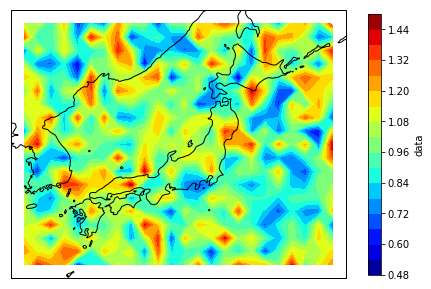

In [81]:
fig, ax = plt.subplots(figsize=(8,8))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='50m')                 # the level of resolution to render the drawings, 
                                                # see documentation for more details

plt.xlim(125,150)                               # set the longitude limits for the map

plt.ylim(28,48)                                 # set the latitude limits for the map

xi  = np.linspace(125, 150, (150-125)+1)        # define the grid
yi = np.linspace(28, 48, (48 - 28)+1)

zi = griddata(lons, lats, data
            , xi, yi, interp='linear')         # grid the data            



cbar = ax.contourf(xi,yi,zi                     # plot the contours
            , 15                                # number of levels
            , cmap=plt.cm.jet                   # colormap
            , transform=proj)                   # projection to plot data in

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              

# Contour plot - Log scale

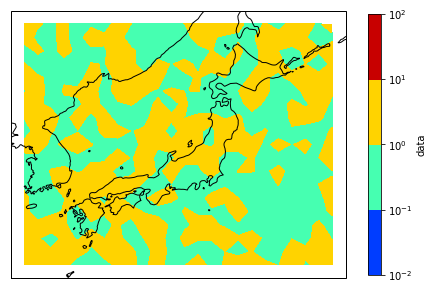

In [83]:
from matplotlib import ticker                   # import ticker

fig, ax = plt.subplots(figsize=(8,8))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='50m')                 # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
plt.xlim(125,150)                               # set the longitude limits for the map

plt.ylim(28,48)                                 # set the latitude limits for the map

xi  = np.linspace(125, 150, (150-125)+1)        # define the grid
yi = np.linspace(28, 48, (48 - 28)+1)

zi = griddata(lons, lats, data                  # grid the data
              , xi, yi, interp='linear')

cbar = ax.contourf(xi,yi,zi                     # plot the contours
            , 15                                # number of levels
            , cmap=plt.cm.jet                   # colormap
            , locator=ticker.LogLocator()       # set scale as log for z-axis ticks
            , transform=proj)                   # projection to plot data in

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              


# Block plot - Linear scale

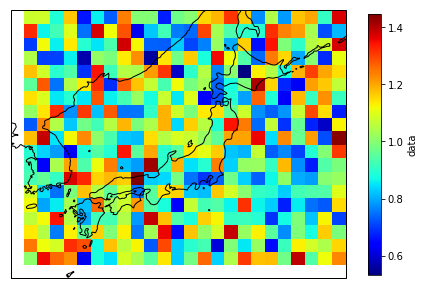

In [82]:
fig, ax = plt.subplots(figsize=(8,8))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='50m')                 # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
plt.xlim(125,150)                               # set the longitude limits for the map

plt.ylim(28,48)                                 # set the latitude limits for the map

xi  = np.linspace(125, 150, (150-125)+1)        # define the grid
yi = np.linspace(28, 48, (48 - 28)+1)

zi = griddata(lons, lats, data                  # grid the data
              , xi, yi, interp='linear')        

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , cmap=plt.cm.jet                 # colormap
              , transform=proj)                 # projection to plot data in                    

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              

# Block plot - Log scale

/Users/caiken/anaconda3/envs/cartopy/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


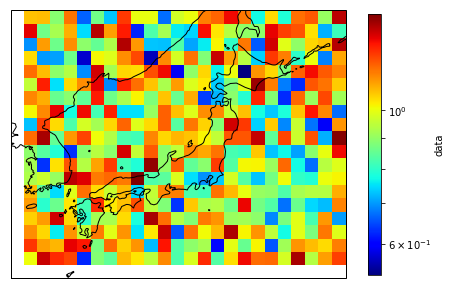

In [97]:
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax = plt.subplots(figsize=(8,8))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='50m')                 # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
plt.xlim(125,150)                               # set the longitude limits for the map

plt.ylim(28,48)                                 # set the latitude limits for the map

xi  = np.linspace(125, 150, (150-125)+1)        # define the grid
yi = np.linspace(28, 48, (48 - 28)+1)

zi = griddata(lons, lats, data                  # grid the data
              , xi, yi, interp='linear')        

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , vmin=np.min(zi)
              , vmax=np.max(zi)
              , cmap=plt.cm.jet                 # colormap
              , norm=LogNorm()                  # set scale as log for z-axis ticks
              , transform=proj)                 # projection to plot data in                    

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              

# Plotting without interpolation

Let's prepare the data...

In [101]:
# read some data
df = pd.read_csv('data/anss.csv', delim_whitespace=True)

# cut the data around Japan
df = df[df.Lon.between(125, 150) & df.Lat.between(28, 48)].copy()
        
# count the number of earthquakes in each rounded latitude/longitude pair
eq_count = df.groupby(['Lat', 'Lon']).apply(round).groupby(['Lat','Lon']).count().reset_index()

# define the grid
lon_i = np.linspace(125, 150, (150 - 125) + 1)
lat_i = np.linspace(28, 48, (48 - 28) + 1)

# create new indices 
from itertools import product
new_index = [x for x in product(lon_i, lat_i)]

# set the indices and columns to be the longitude and latitude pairs
# keep only the latitude, longitude, and magnitude information
bdata = eq_count.set_index(['Lon', 'Lat']).reindex(new_index).reset_index()[['Lon', 'Lat', 'Mag']].copy()

# pivot the data for plotting
zi = bdata.pivot(index='Lat', columns='Lon', values='Mag').values




Now let's plot the data...

/Users/caiken/anaconda3/envs/cartopy/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


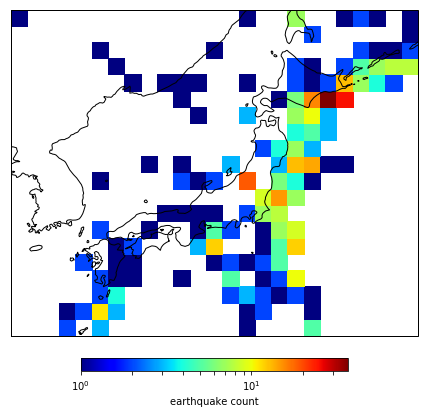

In [104]:
# begin making the plot 
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax = plt.subplots(figsize=(8,8))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.coastlines(resolution='50m')                 # the level of resolution to render the drawings, 
                                                # see documentation for more details
    
plt.xlim(125,150)                               # set the longitude limits for the map

plt.ylim(28,48)

xi, yi = np.meshgrid(lon_i, lat_i)              # create a meshgrid for plotting the z values on

zi = np.ma.masked_invalid(zi)                   # mask invalid z values

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , vmin=np.min(zi)
              , vmax=np.max(zi)
              , cmap='jet'                      # colormap
              , norm=LogNorm()                  # set scale as log for z-axis ticks
              , transform=proj)                 # projection to plot data in


fig.colorbar(cbar                               # add a colorbar
            , orientation='horizontal'          # orientation of the colorbar 
            , label='earthquake count'          # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              